<a href="https://colab.research.google.com/github/nehana4sph/TCS-iON_RIO-125-Forecasting-System/blob/main/New_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xplotter --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas==1.2.0
!pip install xlrd==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# Libraries
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np 
import math 
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import xlrd

df = pd.read_excel('/content/gdrive/MyDrive/Internship/Superstore.xls')

Mounted at /content/gdrive


In [ ]:
#Data Cleaning
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.drop('Row ID',axis=1,inplace=True)
df.drop('Order ID',axis=1,inplace=True)
df.drop('Country',axis=1,inplace=True)

In [ ]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

Most Popular Category

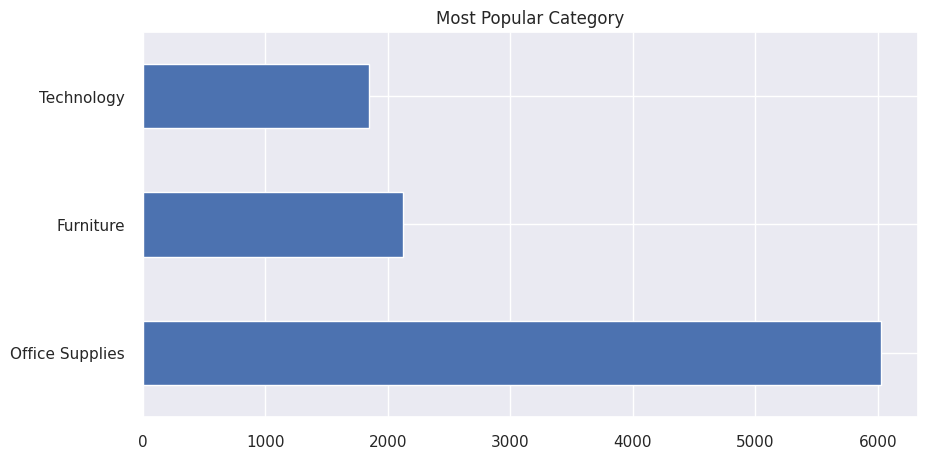

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})

df['Category'].value_counts().plot(kind='barh',title='Most Popular Category')

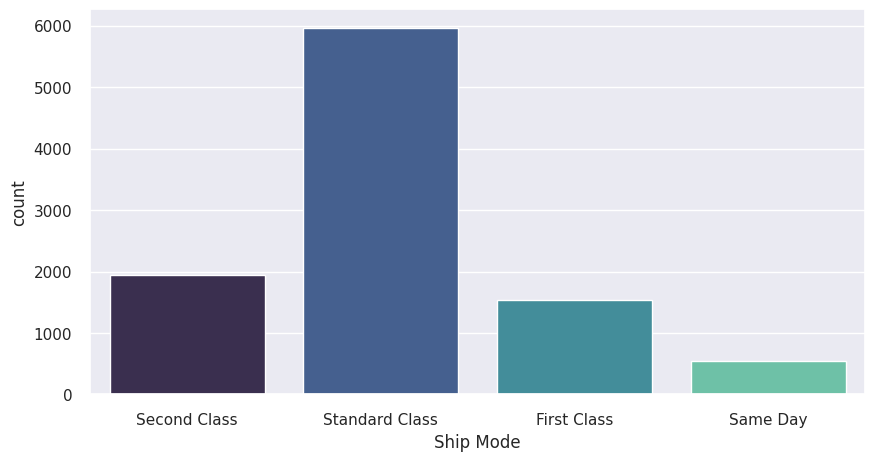

In [ ]:
sns.countplot(x=df['Ship Mode'],palette='mako')

Profit Per Category

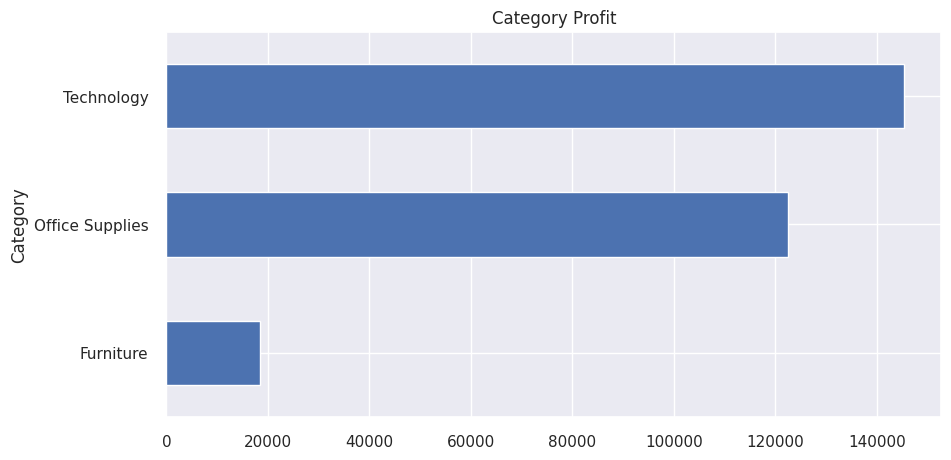

In [ ]:
df.groupby('Category')['Profit'].sum().plot(kind='barh',title='Category Profit')

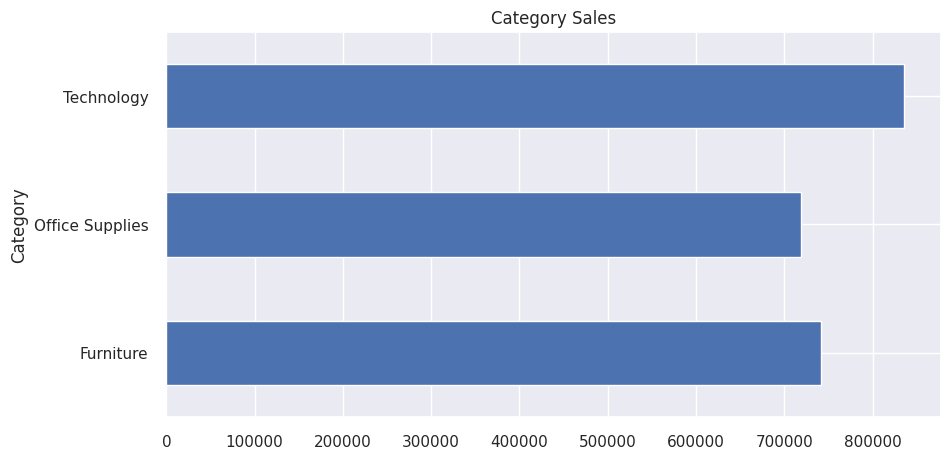

In [ ]:
df.groupby('Category')['Sales'].sum().plot(kind='barh',title='Category Sales')

In [ ]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

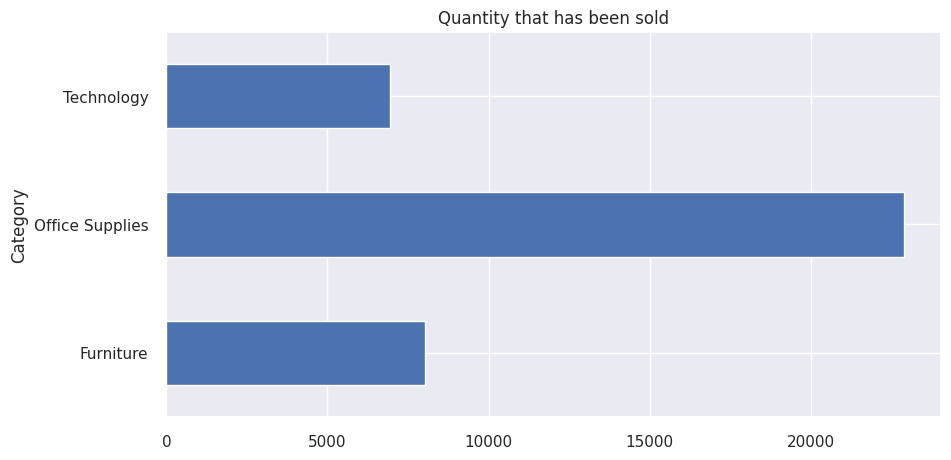

In [ ]:
df.groupby('Category')['Quantity'].sum().plot(kind='barh',title='Quantity that has been sold')

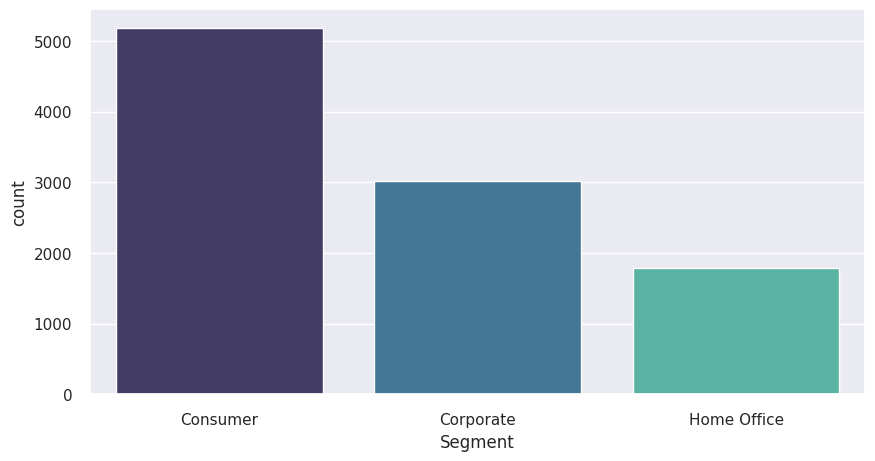

In [ ]:
sns.countplot(x=df['Segment'],palette='mako')

####Most Ordered Category Per Region####
Global Plot



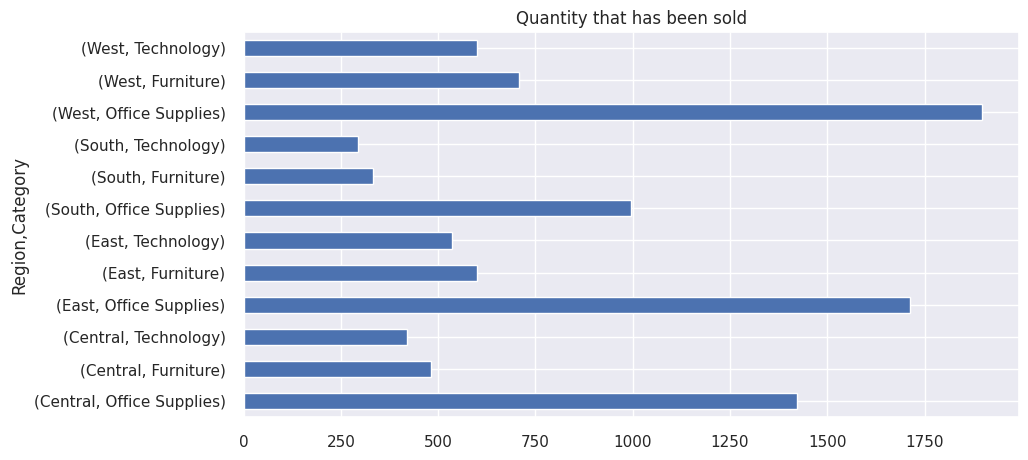

In [ ]:
df.groupby('Region')['Category'].value_counts().plot(kind='barh',title='Quantity that has been sold')

Repartition of the Profit per Region


In [ ]:
labels = df.groupby('Region')['Profit'].sum().index
values = df.groupby('Region')['Profit'].sum().values

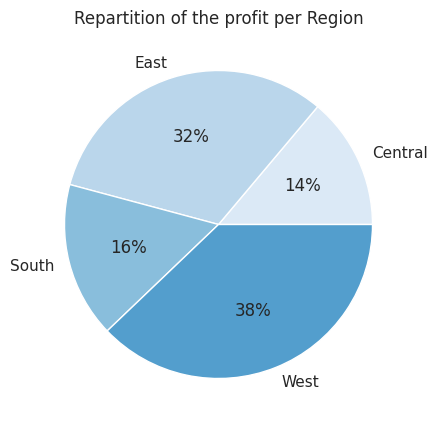

In [ ]:
colors = sns.color_palette("Blues")[0:4]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the profit per Region")
plt.show()


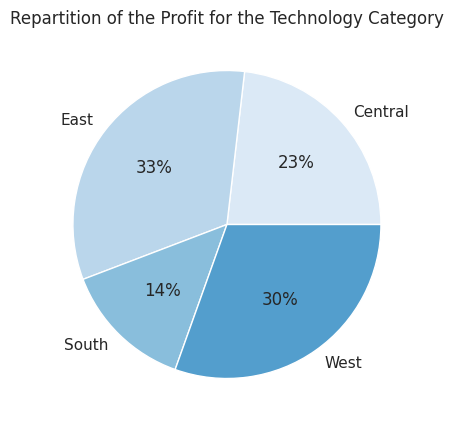

In [ ]:
A = df[df['Category'] == 'Technology']

labels = A.groupby('Region')['Profit'].sum().index
values = A.groupby('Region')['Profit'].sum().values

plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the Technology Category")
plt.show()

Text(0.5, 1.0, 'Sub-Category Count')

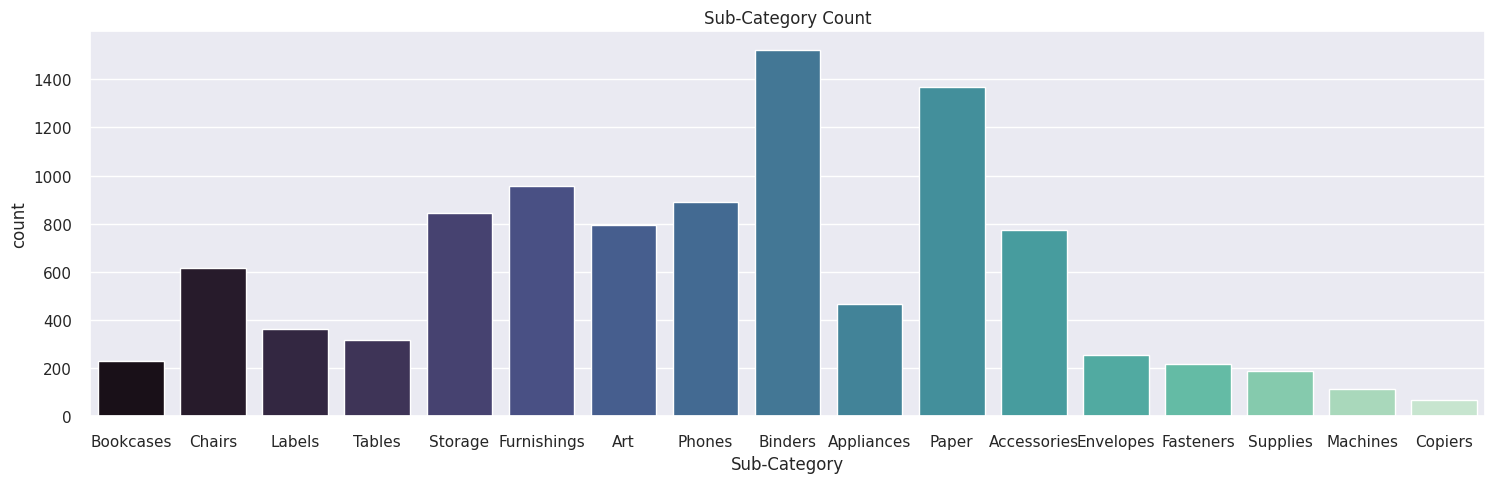

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Sub-Category'],palette='mako')
plt.title("Sub-Category Count")